# Model Training
## Guide

In [ ]:
guide = "https://www.kaggle.com/code/scipygaurav/mastering-ml-classifiers-tuning-98-61-acc/notebook"

**Objective:** The objective of this project is to develop a robust model for accurately diagnosing "erythemato-squamous" diseases based on clinical and histopathological features. These diseases, including psoriasis, seborrheic dermatitis, lichen planus, pityriasis rosea, chronic dermatitis, and pityriasis rubra pilaris, present similar clinical symptoms of erythema and scaling, making their differential diagnosis challenging. By leveraging machine learning techniques, we aim to create a model that can differentiate between these diseases based on the provided features.

**Dataset:** The dataset used for this project consists of clinical and histopathological data from patients with "erythemato-squamous" diseases. The dataset includes 12 clinical features and 22 histopathological features. The clinical features represent observations made during the clinical evaluation, while the histopathological features are determined through microscopic analysis of skin samples.

**Feature Value Information:** In this dataset, the family history feature is encoded as 1 if any of the diseases in the "erythemato-squamous" group has been observed in the family and 0 otherwise. The age feature represents the age of the patient. The remaining features, both clinical and histopathological, are assigned values on a scale of 0 to 3. A value of 0 indicates the absence of the feature, while a value of 3 represents the highest degree or largest amount of the feature. Intermediate values of 1 and 2 indicate relative intermediate levels of the feature. The dataset aims to assist in the differential diagnosis of these diseases by utilizing both clinical and histopathological information. By training a machine learning model on this dataset, we aim to improve the accuracy and efficiency of diagnosing "erythemato-squamous" diseases, reducing the need for invasive procedures like biopsies.

**Methodology:** In this project, we will focus on comparing the accuracy scores of various models to identify the most effective model for predicting erythemato-squamous. By leveraging the dataset's predictors, we will construct and evaluate multiple models, each employing different algorithms or techniques. The performance of these models will be assessed based on their accuracy and computation cost in predicting erythemato-squamous.

To access the complete dataset, please visit the following page: https://www.kaggle.com/datasets/olcaybolat1/dermatology-dataset-classification

## Make necessary imports

In [1]:
import time
import opendatasets as od
import pandas as pd
import numpy as np
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import sklearn.model_selection
from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import TSNE

from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
import lightgbm as lgbm
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from catboost import CatBoostClassifier

from skopt import gp_minimize
from skopt.space import Real, Integer
from skopt.utils import use_named_args
from skopt.plots import plot_convergence

import seaborn as sns
sns.set_style("darkgrid")

c:\Users\henri\anaconda3\envs\ML-Pipeline\Lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\henri\anaconda3\envs\ML-Pipeline\Lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
c:\Users\henri\anaconda3\envs\ML-Pipeline\Lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


## Importing data
### Import data

In [2]:
od.download("https://www.kaggle.com/datasets/olcaybolat1/dermatology-dataset-classification")   # Got error, so I downloaded it manually

Skipping, found downloaded files in ".\dermatology-dataset-classification" (use force=True to force download)


### Read data

In [3]:
file = 'dermatology-dataset-classification/dermatology_database_1.csv'
df = pd.read_csv(file)
df.head()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_granular_layer,vacuolisation_damage_basal_layer,spongiosis,saw_tooth_appearance_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_mononuclear_infiltrate,band_like_infiltrate,age,class
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3


## Exploratory Data Analysis (EDA)

In [4]:
df.shape

(366, 35)

In [5]:
df['class'].value_counts()

1    112
3     72
2     61
5     52
4     49
6     20
Name: class, dtype: int64

**Insights:**
- Given the presence of class imbalance in the dataset, it is crucial to employ appropriate evaluation metrics that can effectively address this issue.
- In this analysis, we will utilize metrics such as the F1-score to evaluate the performance of machine learning classifiers. This approach allows us to accurately assess the models' ability to handle class imbalance and make reliable predictions.

By examining how different ML classifiers handle this challenge, we can gain valuable insights into their effectiveness and suitability for the given dataset.

## Data Cleaning

Data cleaning is a critical step in the data preprocessing phase. It involves handling:
- Missing values
- Removing duplicates, and
- Addressing inconsistencies or errors present in the dataset.

By ensuring the cleanliness and reliability of the data, we significantly reduce the likelihood of biased or inaccurate analysis.

Data cleaning plays a pivotal role in achieving "tidy data," which is essential for conducting further operations and analyses effectively. In this section, we will meticulously analyze the data types of variables and correct them if necessary. Additionally, we will identify and handle null values in the dataset.

By adhering to robust data cleaning practices, we ensure that the dataset is in optimal condition for subsequent analysis and modeling.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   erythema                             366 non-null    int64 
 1   scaling                              366 non-null    int64 
 2   definite_borders                     366 non-null    int64 
 3   itching                              366 non-null    int64 
 4   koebner_phenomenon                   366 non-null    int64 
 5   polygonal_papules                    366 non-null    int64 
 6   follicular_papules                   366 non-null    int64 
 7   oral_mucosal_involvement             366 non-null    int64 
 8   knee_and_elbow_involvement           366 non-null    int64 
 9   scalp_involvement                    366 non-null    int64 
 10  family_history                       366 non-null    int64 
 11  melanin_incontinence                 366 non-

### Missing values:

In [7]:
df.isna().sum()

erythema                               0
scaling                                0
definite_borders                       0
itching                                0
koebner_phenomenon                     0
polygonal_papules                      0
follicular_papules                     0
oral_mucosal_involvement               0
knee_and_elbow_involvement             0
scalp_involvement                      0
family_history                         0
melanin_incontinence                   0
eosinophils_infiltrate                 0
PNL_infiltrate                         0
fibrosis_papillary_dermis              0
exocytosis                             0
acanthosis                             0
hyperkeratosis                         0
parakeratosis                          0
clubbing_rete_ridges                   0
elongation_rete_ridges                 0
thinning_suprapapillary_epidermis      0
spongiform_pustule                     0
munro_microabcess                      0
focal_hypergranu

**Insights:**

By using the df.isna() function, we can confirm that there are no null values present in the dataset. However, upon further inspection, we observed that there are some rows in the dataset where the age column is denoted as "?".

To address this issue, we will remove the rows containing the "?" value in the age column from the dataset. This step ensures that the data remains accurate and reliable for subsequent analysis.

In [8]:
age_values_with_question_mark = df[df['age'] == '?']
age_values_with_question_mark

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_granular_layer,vacuolisation_damage_basal_layer,spongiosis,saw_tooth_appearance_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_mononuclear_infiltrate,band_like_infiltrate,age,class
33,2,2,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,?,1
34,2,1,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,?,4
35,2,2,1,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,?,2
36,2,1,2,3,2,3,0,2,0,0,...,0,2,0,2,0,0,0,3,?,3
262,2,1,0,2,0,0,0,0,0,0,...,0,0,2,0,0,0,3,0,?,5
263,1,1,1,3,0,0,0,0,0,0,...,0,0,3,0,0,0,2,0,?,5
264,1,1,0,2,0,0,0,0,1,0,...,0,0,2,0,0,0,3,0,?,5
265,1,1,0,3,0,0,0,0,0,0,...,0,0,2,0,0,0,3,0,?,5


In [9]:
df['age'] = df['age'].replace('?', np.nan)  # Replace '?' with NaN

# we remove rows with NaN values in the 'age' column using dropna() function
df.dropna(subset=['age'], inplace=True)

In [10]:
df['age'] = df['age'].replace('?', np.nan)  # Replace '?' with NaN

# we remove rows with NaN values in the 'age' column using dropna() function
df.dropna(subset=['age'], inplace=True)

In [11]:
df['class'].value_counts()

1    111
3     71
2     60
5     48
4     48
6     20
Name: class, dtype: int64

In [12]:
df.dtypes

erythema                                int64
scaling                                 int64
definite_borders                        int64
itching                                 int64
koebner_phenomenon                      int64
polygonal_papules                       int64
follicular_papules                      int64
oral_mucosal_involvement                int64
knee_and_elbow_involvement              int64
scalp_involvement                       int64
family_history                          int64
melanin_incontinence                    int64
eosinophils_infiltrate                  int64
PNL_infiltrate                          int64
fibrosis_papillary_dermis               int64
exocytosis                              int64
acanthosis                              int64
hyperkeratosis                          int64
parakeratosis                           int64
clubbing_rete_ridges                    int64
elongation_rete_ridges                  int64
thinning_suprapapillary_epidermis 

**Insights:**

The 'age' column in the dataset is currently of object type. In order to utilize the age as an input feature in our analysis, we need to convert it to an integer type. By doing so, we ensure that the age values are represented numerically and can be used effectively in our models and calculations.

### Addressing inconsistencies

In [13]:
df['age'] = df['age'].astype(float).astype(pd.Int64Dtype())  # Convert to float and then to integer

In [14]:
df.dtypes

erythema                               int64
scaling                                int64
definite_borders                       int64
itching                                int64
koebner_phenomenon                     int64
polygonal_papules                      int64
follicular_papules                     int64
oral_mucosal_involvement               int64
knee_and_elbow_involvement             int64
scalp_involvement                      int64
family_history                         int64
melanin_incontinence                   int64
eosinophils_infiltrate                 int64
PNL_infiltrate                         int64
fibrosis_papillary_dermis              int64
exocytosis                             int64
acanthosis                             int64
hyperkeratosis                         int64
parakeratosis                          int64
clubbing_rete_ridges                   int64
elongation_rete_ridges                 int64
thinning_suprapapillary_epidermis      int64
spongiform

The Data Cleaning process for the Dermatology Dataset has been completed. Above are the final columns and their corresponding data types after the necessary adjustments.

## Data Visualization

In this section, we utilize data visualization techniques to visually explore and communicate insights from the Dermatology Dataset.

By creating meaningful and informative visual representations such as plots, charts, and graphs, we aim to uncover patterns, relationships, and trends within the data.

Data visualization enhances our understanding of the dataset, making it easier to convey findings and key messages to stakeholders and decision-makers.

Through effective visualizations, we can highlight important patterns and correlations, enabling better-informed decision-making and actionable insights.

### Histogram

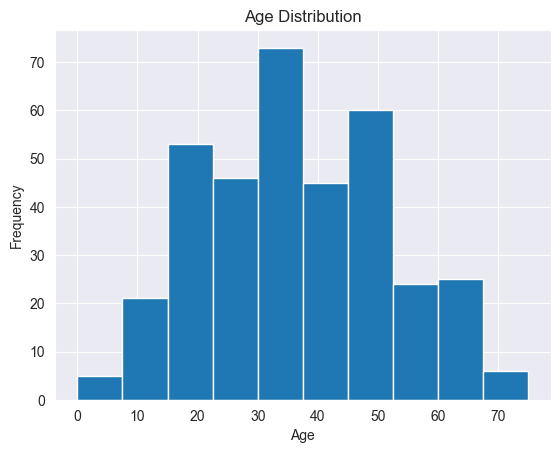

In [16]:
# Plot a histogram of the 'age' column
plt.hist(df['age'], bins=10)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

**Insights:**

- The histogram allows us to visualize the distribution of a numerical variable, such as the 'age' column in your DataFrame.
- By plotting a histogram, we can understand the frequency and range of ages present in our dataset.
- This can help identify patterns or anomalies in the age distribution, such as whether it is skewed, normally distributed, or has any significant peaks or gaps.

### Bar plot

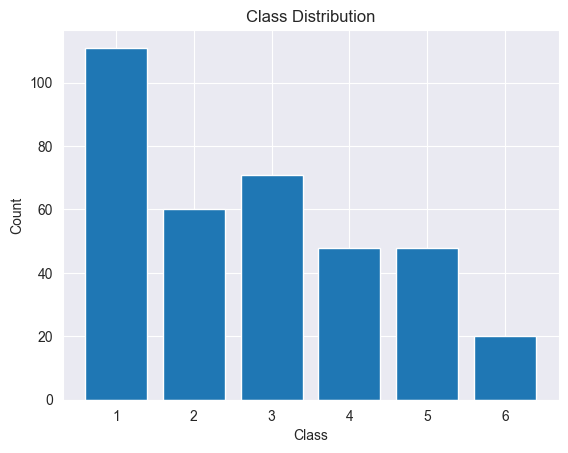

In [17]:
# Plot a bar plot of the 'class' column
class_counts = df['class'].value_counts()
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

**Insights:**

- The bar plot is useful for visualizing the frequency or count of different categories in a categorical variable, such as the 'class' column in our DataFrame.
- By plotting a bar plot, we can compare the number of instances for each class and gain insights into the class distribution.
- This visualization can reveal class imbalances, identify dominant or minority classes, or provide an overview of the distribution of the target variable.

### Correlation matrix

In [18]:
# Calculate the correlation matrix
corr_matrix = df.corr()

corr_matrix

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,...,disappearance_granular_layer,vacuolisation_damage_basal_layer,spongiosis,saw_tooth_appearance_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_mononuclear_infiltrate,band_like_infiltrate,age,class
erythema,1.000000,0.428769,0.248062,-0.033157,-0.008496,0.028225,-0.115275,-0.033391,0.138519,0.180740,...,0.153229,-0.003972,0.038837,-0.012408,-0.008997,0.006100,0.093026,-0.013850,-0.005028,-0.324846
scaling,0.428769,1.000000,0.347106,-0.072191,-0.009033,-0.075013,-0.098665,-0.084815,0.294258,0.295932,...,0.205046,-0.113133,0.023095,-0.118109,-0.014702,-0.015402,-0.008453,-0.134966,0.016006,-0.458499
definite_borders,0.248062,0.347106,1.000000,-0.058534,0.239778,0.322657,-0.176715,0.280341,0.301187,0.261495,...,0.350007,0.291443,-0.252643,0.267409,-0.093264,-0.131788,0.124812,0.275099,0.138493,-0.381456
itching,-0.033157,-0.072191,-0.058534,1.000000,0.280039,0.412525,-0.144027,0.361761,-0.296824,-0.152562,...,-0.190548,0.371404,0.003028,0.380075,-0.176096,-0.184385,0.051553,0.389887,0.048053,0.039744
koebner_phenomenon,-0.008496,-0.009033,0.239778,0.280039,1.000000,0.388233,-0.175676,0.387937,-0.065438,0.013496,...,0.002588,0.372236,0.006726,0.377539,-0.150348,-0.166956,0.110295,0.377323,0.081162,-0.089586
polygonal_papules,0.028225,-0.075013,0.322657,0.412525,0.388233,1.000000,-0.139384,0.863269,-0.278843,-0.258231,...,-0.122467,0.911598,0.091031,0.894775,-0.097084,-0.112007,0.258753,0.904112,0.096953,0.064451
follicular_papules,-0.115275,-0.098665,-0.176715,-0.144027,-0.175676,-0.139384,1.000000,-0.134484,0.220849,-0.007320,...,-0.161487,-0.142335,-0.012624,-0.141489,0.784991,0.844721,-0.093833,-0.136311,-0.371368,0.488708
oral_mucosal_involvement,-0.033391,-0.084815,0.280341,0.361761,0.387937,0.863269,-0.134484,1.000000,-0.286160,-0.264638,...,-0.109676,0.886238,0.129879,0.873730,-0.084040,-0.108070,0.276068,0.890685,0.111047,0.062185
knee_and_elbow_involvement,0.138519,0.294258,0.301187,-0.296824,-0.065438,-0.278843,0.220849,-0.286160,1.000000,0.659286,...,0.480594,-0.285184,-0.417851,-0.283383,0.231977,0.256811,-0.079246,-0.279753,-0.078267,-0.382276
scalp_involvement,0.180740,0.295932,0.261495,-0.152562,0.013496,-0.258231,-0.007320,-0.264638,0.659286,1.000000,...,0.485260,-0.257697,-0.425421,-0.262429,-0.055091,-0.020456,0.027887,-0.255333,0.036412,-0.534716


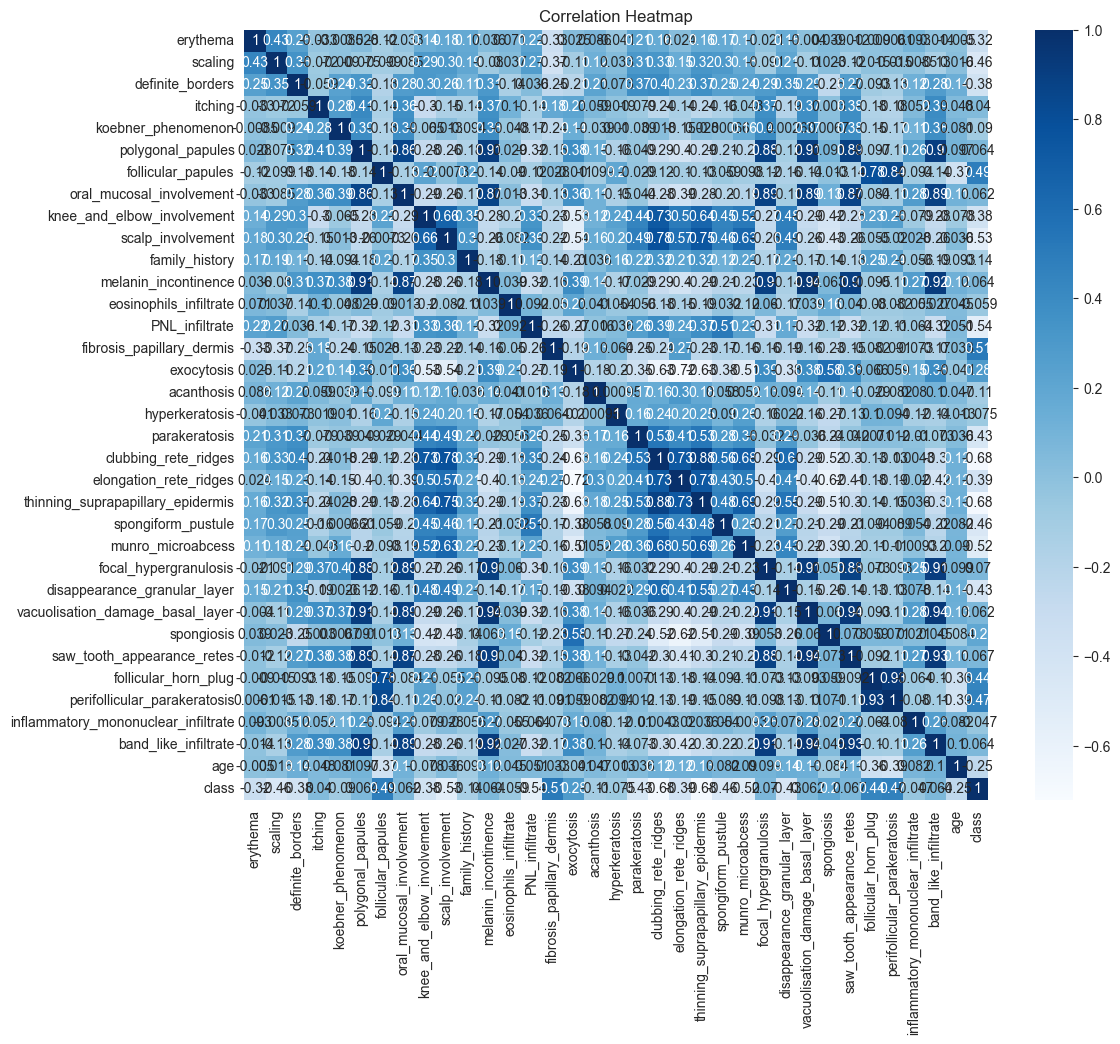

In [19]:
# Plot the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

**Insights:**

- The correlation heatmap helps visualize the pairwise correlations between numerical variables in our DataFrame.
- By calculating the correlation matrix and plotting it as a heatmap, we can identify the strength and direction of the relationships between different variables.
- This can assist in understanding the interdependencies between variables and identifying potential patterns or associations.
- For example, if two variables have a high positive correlation, it indicates that they tend to increase or decrease together.
- Conversely, a high negative correlation suggests an inverse relationship.

## Understanding Data using t-SNE

t-SNE (t-Distributed Stochastic Neighbor Embedding) is a dimensionality reduction technique used to visualize high-dimensional data in a lower-dimensional space.

In this section, we apply t-SNE to gain a better understanding of the data's structure and identify potential clusters or patterns that may exist in the dataset.

In [20]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [21]:
le = LabelEncoder()
y = le.fit_transform(y)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 358 samples in 0.001s...
[t-SNE] Computed neighbors for 358 samples in 0.012s...
[t-SNE] Computed conditional probabilities for sample 358 / 358
[t-SNE] Mean sigma: 3.587629
[t-SNE] Computed conditional probabilities in 0.014s
[t-SNE] Iteration 50: error = 51.7996101, gradient norm = 0.0354695 (50 iterations in 0.082s)
[t-SNE] Iteration 100: error = 50.9201355, gradient norm = 0.0102756 (50 iterations in 0.059s)
[t-SNE] Iteration 150: error = 50.8967400, gradient norm = 0.0047021 (50 iterations in 0.065s)
[t-SNE] Iteration 200: error = 50.8953094, gradient norm = 0.0114055 (50 iterations in 0.061s)
[t-SNE] Iteration 250: error = 50.8886948, gradient norm = 0.0075044 (50 iterations in 0.064s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.888695
[t-SNE] Iteration 300: error = 0.3804583, gradient norm = 0.0062349 (50 iterations in 0.067s)
[t-SNE] Iteration 350: error = 0.3438582, gradient norm = 0.0043493 (

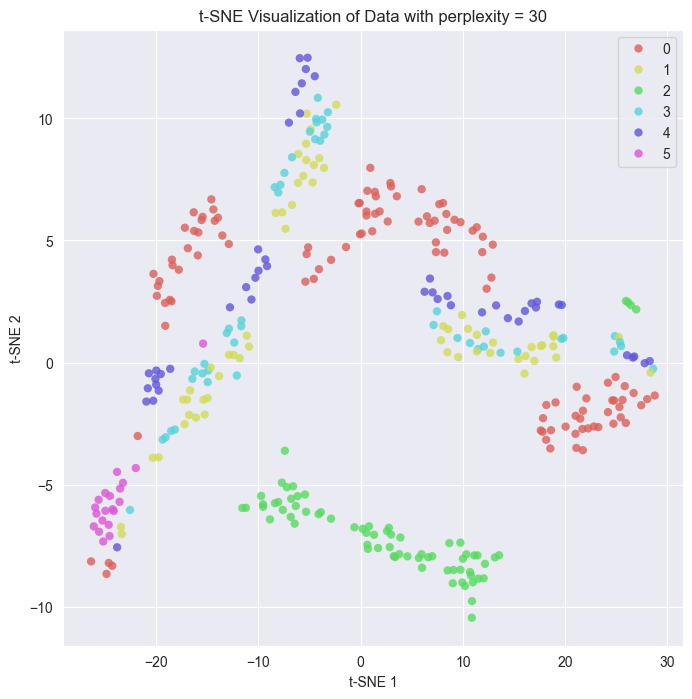

In [27]:
# Apply t-SNE
tsne = TSNE(n_components=2, random_state=110, verbose=2)
x_tsne = tsne.fit_transform(x)


# Create a scatterplot of the t-SNE graph
plt.figure(figsize=(8, 8))
sns.scatterplot(
    x=x_tsne[:,0], y=x_tsne[:,1],
    hue=y, palette=sns.color_palette("hls", len(np.unique(y))),
    alpha=0.8, edgecolor='none'
)

plt.title('t-SNE Plot for Dermatology Dataset')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('t-SNE Visualization of Data with perplexity = 30')
plt.legend(loc='upper right')
plt.show()

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 358 samples in 0.001s...
[t-SNE] Computed neighbors for 358 samples in 0.028s...
[t-SNE] Computed conditional probabilities for sample 358 / 358
[t-SNE] Mean sigma: 6.469945
[t-SNE] Computed conditional probabilities in 0.054s
[t-SNE] Iteration 50: error = 42.3914871, gradient norm = 0.0433326 (50 iterations in 0.111s)
[t-SNE] Iteration 100: error = 41.9658089, gradient norm = 0.0001287 (50 iterations in 0.133s)
[t-SNE] Iteration 150: error = 41.9657021, gradient norm = 0.0001982 (50 iterations in 0.112s)
[t-SNE] Iteration 200: error = 41.9660072, gradient norm = 0.0001983 (50 iterations in 0.084s)
[t-SNE] Iteration 250: error = 41.9656830, gradient norm = 0.0002103 (50 iterations in 0.132s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 41.965683
[t-SNE] Iteration 300: error = 0.1323400, gradient norm = 0.0080183 (50 iterations in 0.126s)
[t-SNE] Iteration 350: error = 0.1201261, gradient norm = 0.0006993 

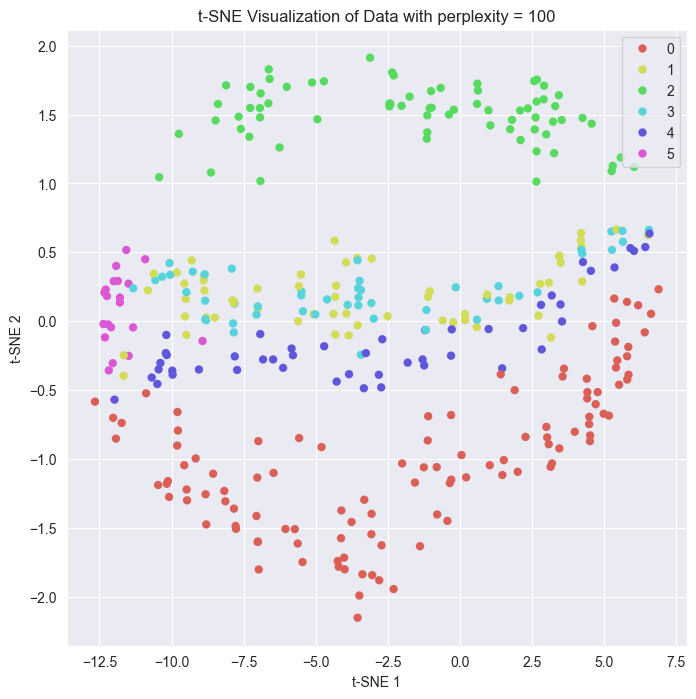

In [28]:
# Apply t-SNE with higher perplexity
tsne = TSNE(n_components=2, random_state=110, verbose=2, perplexity = 100)
x_tsne = tsne.fit_transform(x)


# Create a scatterplot of the t-SNE graph
plt.figure(figsize=(8, 8))
sns.scatterplot(
    x=x_tsne[:,0], y=x_tsne[:,1],
    hue=y, palette=sns.color_palette("hls", len(np.unique(y))),
    alpha=1, edgecolor='none'
)


plt.title('t-SNE Plot for Dermatology Dataset')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('t-SNE Visualization of Data with perplexity = 100')
plt.legend(loc='upper right')
plt.show()

[t-SNE] Computing 357 nearest neighbors...
[t-SNE] Indexed 358 samples in 0.000s...
[t-SNE] Computed neighbors for 358 samples in 0.024s...
[t-SNE] Computed conditional probabilities for sample 358 / 358
[t-SNE] Mean sigma: 11.871308
[t-SNE] Computed conditional probabilities in 0.066s
[t-SNE] Iteration 50: error = 36.1409302, gradient norm = 0.0000002 (50 iterations in 0.111s)
[t-SNE] Iteration 100: error = 36.1403770, gradient norm = 0.0000000 (50 iterations in 0.122s)
[t-SNE] Iteration 100: gradient norm 0.000000. Finished.
[t-SNE] KL divergence after 100 iterations with early exaggeration: 36.140377
[t-SNE] Iteration 150: error = 0.0664164, gradient norm = 0.0077617 (50 iterations in 0.091s)
[t-SNE] Iteration 200: error = 0.0258624, gradient norm = 0.0002278 (50 iterations in 0.091s)
[t-SNE] Iteration 250: error = 0.0259524, gradient norm = 0.0001036 (50 iterations in 0.137s)
[t-SNE] Iteration 300: error = 0.0259856, gradient norm = 0.0001300 (50 iterations in 0.116s)
[t-SNE] Itera

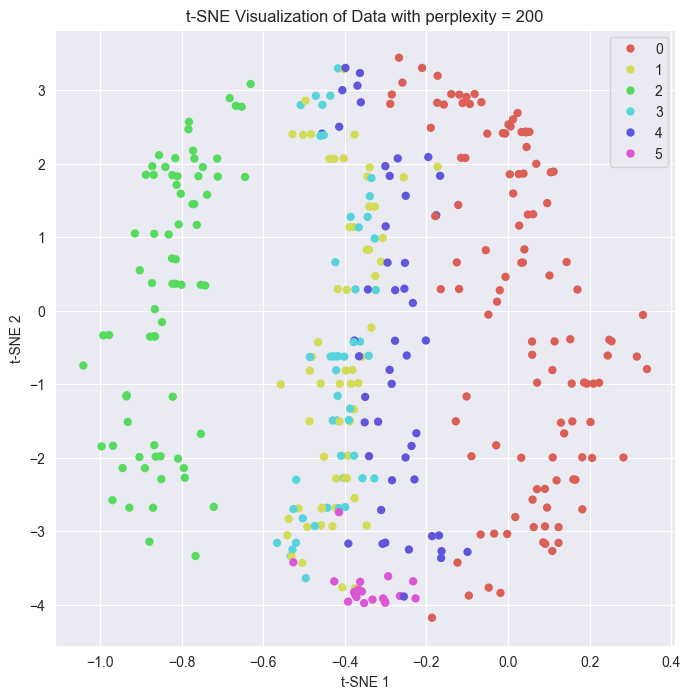

In [29]:
# Apply t-SNE with more high perplexity
tsne = TSNE(n_components=2, random_state=110, verbose=2, perplexity = 200)
x_tsne = tsne.fit_transform(x)


# Create a scatterplot of the t-SNE graph
plt.figure(figsize=(8, 8))
sns.scatterplot(
    x=x_tsne[:,0], y=x_tsne[:,1],
    hue=y, palette=sns.color_palette("hls", len(np.unique(y))),
    alpha=1, edgecolor='none'
)


# plt.title('t-SNE Plot for Dermatology Dataset')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('t-SNE Visualization of Data with perplexity = 200')
plt.legend(loc='upper right')
plt.show()

**Insights:**

- Upon analyzing the dataset, we can observe that the class features '0', '2', and '5' appear to be well separated and distinguishable.
- However, the class features '1', '3', and '4' exhibit overlapping patterns, making it challenging to separate them effectively.
- This overlapping nature may pose difficulties for our model, as it may struggle to accurately classify instances belonging to these classes.
- We can further examine this observation by reviewing the confusion matrix and classification report during the model evaluation process.

## Preparing Data for Modelling

This section focuses on preparing the data for machine learning modeling.

It involves various preprocessing steps such as *feature scaling*, *encoding categorical variables*, and *splitting the data into training and testing sets*.

Properly preparing the data ensures it is in a suitable format for training and evaluating machine learning models.

In [30]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [31]:
le = LabelEncoder()
y = le.fit_transform(y)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 110)

In [33]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(286, 34)
(286,)
(72, 34)
(72,)


**Insights:**

- Now that we have prepared our training and testing datasets, we can proceed with evaluating the performance of multiple machine learning classifiers. During this evaluation, we will assess various metrics such as accuracy, precision, recall, F1 score, and training time for each classifier. This comparative analysis will allow us to determine the effectiveness and efficiency of different classifiers in predicting erythemato-squamous based on the provided dataset.

- By systematically evaluating the performance metrics of each classifier, we can gain insights into their strengths and weaknesses. This information will aid in selecting the most suitable classifier for our specific task of erythemato-squamous prediction. Additionally, comparing the metrics across different classifiers will provide valuable information for making informed decisions and optimizing our modeling approach.

- The performance metrics, including accuracy, precision, recall, F1 score, and training time, will be recorded and analyzed to identify the classifier that achieves the best overall performance. This process will contribute to the selection of a robust and accurate model for predicting erythemato-squamous in the given dataset.

## Evaluating all ML Classifiers

Here, we evaluate the performance of various machine learning classifiers on the dataset.

We assess metrics such as accuracy, precision, recall, and F1-score to determine how well each model predicts erythemato-squamous.

By comparing the results, we can identify the models that perform the best on our dataset.

In [34]:
# Define a dictionary to store the results
results = {}

### 1. Logistic Regression

**About Model:**
- A linear classifier that models the probability of the target class using a logistic function.
- It's a simple yet effective method that works well when the classes are linearly separable.
- It's also easy to interpret the coefficients of the logistic regression model.

In [45]:
start_time = time.time()
logistic = LogisticRegression(max_iter=1000)            # Max number of iterations reached, increased the number of iterations to 1000 to run the code
logistic.fit(X_train, y_train)
y_pred = logistic.predict(X_test)

end_time = time.time()
training_time = end_time - start_time

results['Logistic Regression'] = [accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred, average='weighted'),
                                  recall_score(y_test, y_pred, average='weighted'),
                                  f1_score(y_test, y_pred, average='weighted'),
                                  training_time]

### 2. K-Nearest Neighbors (KNN)

**About Model:**
- A non-parametric classifier that finds the K nearest neighbors to the query point and assigns the majority class label to the query point.
- It's a simple and intuitive method that works well for small datasets and can handle non-linear relationships between the features and the target class.

In [47]:
start_time = time.time()
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

end_time = time.time()
training_time = end_time - start_time

results['K-Nearest Neighbors (KNN)'] = [accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred, average='weighted'),
                                  recall_score(y_test, y_pred, average='weighted'),
                                  f1_score(y_test, y_pred, average='weighted'),
                                  training_time]

### 3. Gaussian Naive Bayes (GaussianNB)

**About Model:**
- A probabilistic classifier that models the joint distribution of the features and the target class using Bayes' theorem and the assumption that the features are conditionally independent given the target class.
- It's a simple and fast method that works well for text classification and other high-dimensional problems.

In [48]:
start_time = time.time()
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

end_time = time.time()
training_time = end_time - start_time

results['GaussianNB'] = [accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred, average='weighted'),
                                  recall_score(y_test, y_pred, average='weighted'),
                                  f1_score(y_test, y_pred, average='weighted'),
                                  training_time]

### 4. Decision Trees

**About Model:**
- A non-parametric classifier that models the decision rules as a tree.
- It's a powerful method that works well for both classification and regression problems.
- It's also easy to interpret the decision rules and the importance of the features.

In [49]:
start_time = time.time()
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

end_time = time.time()
training_time = end_time - start_time

results['Decision Trees'] = [accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred, average='weighted'),
                                  recall_score(y_test, y_pred, average='weighted'),
                                  f1_score(y_test, y_pred, average='weighted'),
                                  training_time]

### 5. Random Forest

**About Model:**
- An ensemble method that combines multiple decision trees by aggregating their predictions.
- It's a powerful and robust method that works well for high-dimensional problems and can handle non-linear relationships between the features and the target class.

In [50]:
start_time = time.time()
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

end_time = time.time()
training_time = end_time - start_time

results['Random Forest'] = [accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred, average='weighted'),
                                  recall_score(y_test, y_pred, average='weighted'),
                                  f1_score(y_test, y_pred, average='weighted'),
                                  training_time]

### 6. Extra Trees

**About Model:**
- Extra Trees is a tree-based ensemble method that randomly selects subsets of features and thresholds to reduce overfitting.
- It can handle high-dimensional data and can be more computationally efficient than Random Forests.
- In terms of performance, Extra Trees can achieve good accuracy on high-dimensional datasets and with relatively small training data.

In [51]:
start_time = time.time()
et = ExtraTreesClassifier()
et.fit(X_train, y_train)
y_pred = et.predict(X_test)

end_time = time.time()
training_time = end_time - start_time

results['Extra Trees'] = [accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred, average='weighted'),
                                  recall_score(y_test, y_pred, average='weighted'),
                                  f1_score(y_test, y_pred, average='weighted'),
                                  training_time]

### 7. Support Vector Machines (SVM)

**About Model:**
- A linear or non-linear classifier that finds the hyperplane that maximizes the margin between the classes.
- It's a powerful method that works well for both linearly and non-linearly separable problems.
- It's also less prone to overfitting than other methods.

In [52]:
start_time = time.time()
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

end_time = time.time()
training_time = end_time - start_time

results['Support Vector Machines'] = [accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred, average='weighted'),
                                  recall_score(y_test, y_pred, average='weighted'),
                                  f1_score(y_test, y_pred, average='weighted'),
                                  training_time]

C:\Users\henri\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 8. Neural Networks (Multi-layer Perceptron)

**About Model:**
- A flexible and powerful method that uses multiple layers of interconnected neurons to learn complex relationships between the features and the target class.
- It's a state-of-the-art method that works well for a wide range of problems, including image recognition, natural language processing, and speech recognition.

In [53]:
start_time = time.time()
mlp = MLPClassifier()
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)

end_time = time.time()
training_time = end_time - start_time

results['Neural Networks (Multi-layer Perceptron)'] = [accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred, average='weighted'),
                                  recall_score(y_test, y_pred, average='weighted'),
                                  f1_score(y_test, y_pred, average='weighted'),
                                  training_time]

C:\Users\henri\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### 9. AdaBoost

**About Model:**
- An ensemble method that combines multiple weak classifiers by adjusting the weights of the training samples based on their classification error.
- It's a powerful method that works well for both classification and regression problems and can handle non-linear relationships between the features and the target class.

In [54]:
start_time = time.time()
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)

end_time = time.time()
training_time = end_time - start_time

results['AdaBoost'] = [accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred, average='weighted'),
                                  recall_score(y_test, y_pred, average='weighted'),
                                  f1_score(y_test, y_pred, average='weighted'),
                                  training_time]

C:\Users\henri\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 10. XGBoost

**About Model:**
- An optimized implementation of gradient boosting that uses a parallelized tree construction algorithm and a novel regularization method.
- It's a state-of-the-art method that works well for large datasets and can handle non-linear relationships between the features and the target class.

In [55]:
start_time = time.time()
xgboost = xgb.XGBClassifier()
xgboost.fit(X_train, y_train)
y_pred = xgboost.predict(X_test)

end_time = time.time()
training_time = end_time - start_time

results['XGBoost'] = [accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred, average='weighted'),
                                  recall_score(y_test, y_pred, average='weighted'),
                                  f1_score(y_test, y_pred, average='weighted'),
                                  training_time]

### 11. Light Gradient Boosting Machine (LGBM)

**About Model:**
- An optimized implementation of gradient boosting that uses a gradient-based one-sided sampling algorithm and a novel leaf-wise tree construction algorithm.
- It's a state-of-the-art method that works well for large datasets and can handle non-linear relationships between the features and the target class.

In [56]:
start_time = time.time()
lgbm = lgbm.LGBMClassifier()
lgbm.fit(X_train, y_train)
y_pred = lgbm.predict(X_test)

end_time = time.time()
training_time = end_time - start_time

results['LightGBM'] = [accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred, average='weighted'),
                                  recall_score(y_test, y_pred, average='weighted'),
                                  f1_score(y_test, y_pred, average='weighted'),
                                  training_time]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000826 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 161
[LightGBM] [Info] Number of data points in the train set: 286, number of used features: 32
[LightGBM] [Info] Start training from score -1.178655
[LightGBM] [Info] Start training from score -1.849329
[LightGBM] [Info] Start training from score -1.612941
[LightGBM] [Info] Start training from score -2.018406
[LightGBM] [Info] Start training from score -1.942420
[LightGBM] [Info] Start training from score -2.822778
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fu

### 12. CatBoost

**About Model:**
- An ensemble method that combines multiple decision trees by applying gradient boosting with ordered boosting, symmetric trees, and a novel categorical feature handling method.
- It's a state-of-the-art method that works well for both classification and regression problems and can handle categorical features with high cardinality.

In [57]:
start_time = time.time()
cat = CatBoostClassifier()
cat.fit(X_train, y_train)
y_pred = cat.predict(X_test)

end_time = time.time()
training_time = end_time - start_time

results['CatBoost'] = [accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred, average='weighted'),
                                  recall_score(y_test, y_pred, average='weighted'),
                                  f1_score(y_test, y_pred, average='weighted'),
                                  training_time]

Learning rate set to 0.074233
0:	learn: 1.6306339	total: 157ms	remaining: 2m 36s
1:	learn: 1.5070646	total: 159ms	remaining: 1m 19s
2:	learn: 1.4207748	total: 161ms	remaining: 53.6s
3:	learn: 1.3199555	total: 163ms	remaining: 40.7s
4:	learn: 1.2505904	total: 165ms	remaining: 32.9s
5:	learn: 1.1652868	total: 186ms	remaining: 30.9s
6:	learn: 1.0790877	total: 191ms	remaining: 27.2s
7:	learn: 1.0086932	total: 196ms	remaining: 24.3s
8:	learn: 0.9405742	total: 201ms	remaining: 22.1s
9:	learn: 0.8869727	total: 204ms	remaining: 20.2s
10:	learn: 0.8423178	total: 208ms	remaining: 18.7s
11:	learn: 0.7924959	total: 211ms	remaining: 17.3s
12:	learn: 0.7410671	total: 228ms	remaining: 17.3s
13:	learn: 0.7048003	total: 234ms	remaining: 16.5s
14:	learn: 0.6631168	total: 237ms	remaining: 15.6s
15:	learn: 0.6291249	total: 239ms	remaining: 14.7s
16:	learn: 0.5954549	total: 244ms	remaining: 14.1s
17:	learn: 0.5655816	total: 260ms	remaining: 14.2s
18:	learn: 0.5366418	total: 267ms	remaining: 13.8s
19:	learn

### 13. Stochastic Gradient Descent (SGD)

**About Model:**
- SGD is an optimization algorithm that can be used for linear and logistic regression, as well as for training deep neural networks.
- It is particularly useful for large-scale machine learning problems and can converge faster than batch gradient descent.
- In terms of performance, SGD can achieve good accuracy on large-scale datasets, but it can be sensitive to hyperparameter tuning and the choice of learning rate schedule.

In [59]:
start_time = time.time()
sgd = SGDClassifier(loss='log', random_state=42)
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)

end_time = time.time()
training_time = end_time - start_time

results['Stochastic Gradient Descent (SGD)'] = [accuracy_score(y_test, y_pred),
                                  precision_score(y_test, y_pred, average='weighted'),
                                  recall_score(y_test, y_pred, average='weighted'),
                                  f1_score(y_test, y_pred, average='weighted'),
                                  training_time]

InvalidParameterError: The 'loss' parameter of SGDClassifier must be a str among {'modified_huber', 'huber', 'squared_hinge', 'log_loss', 'epsilon_insensitive', 'hinge', 'squared_error', 'perceptron', 'squared_epsilon_insensitive'}. Got 'log' instead.